In [1]:
import numpy as np
from matplotlib import pyplot as plt 

import pandas as pd

import scipy.signal as sg

# Import the data

In [2]:
file='/home/alexandra/Documents/Data/Laura/Linescans/WT 08 20210309 03.csv'

file='/home/alexandra/Documents/Data/Laura/Linescans/WT 08 20210311 06.csv'

data=pd.read_csv(file, decimal='.', delimiter=",")
#data=data.dropna(axis='columns')

In [3]:
data

t        state    endfoot      lumen
0          0.000000  <undefined>  21.896765  13.866288
1          0.008002  <undefined>  22.046401  14.165561
2          0.016003  <undefined>  21.896765  14.165561
3          0.024005  <undefined>  21.896765  14.015924
4          0.032006  <undefined>  21.846886  14.165561
...             ...          ...        ...        ...
150495  1204.200840  <undefined>  20.799432  13.417380
150496  1204.208842  <undefined>  20.849311  13.567016
150497  1204.216843  <undefined>  21.098705  13.567016
150498  1204.224845  <undefined>  20.949069  13.616895
150499  1204.232847  <undefined>  20.949069  13.766531

[150500 rows x 4 columns]

### Get the sequences of REM NREM and IS sleep

In [4]:
from collections import namedtuple

REM_list = []
NREM_list = []
IS_list = []


REM = namedtuple('REM', ['begin', 'end','ibegin','iend'])
NREM = namedtuple('NREM', ['begin', 'end','ibegin','iend'])
IS = namedtuple('IS', ['begin', 'end','ibegin','iend'])

REM_flag = False
REM_value = 0
REM_ivalue = 0

NREM_flag = False
NREM_value = 0
NREM_ivalue = 0

IS_flag = False
IS_value = 0
IS_ivalue = 0

value=0

for i, row in data.iterrows():
    state = row['state']
    valuem1=value
    value = row['t']
    ivalue = i
    
    if not REM_flag and state == 'REM':
        REM_flag = True
        REM_value = value 
        REM_ivalue=i
        
    elif REM_flag and state != 'REM':
        if value >= REM_value + 10:
            new_seq = REM(REM_value, valuem1,REM_ivalue,ivalue-1)
            REM_list.append(new_seq)
            REM_flag = False

    if not NREM_flag and state == 'NREM':
        NREM_flag = True
        NREM_value = value 
        NREM_ivalue=i
        
    elif NREM_flag and state != 'NREM':
        if value >= NREM_value + 10:
            new_seq = NREM(NREM_value, valuem1,NREM_ivalue,ivalue-1)
            NREM_list.append(new_seq)
            NREM_flag = False
            
    if not IS_flag and state == 'IS':
        IS_flag = True
        IS_value = value 
        IS_ivalue=i
        
    elif IS_flag and state != 'IS':
        if value >= IS_value + 10:
            new_seq = IS(IS_value, valuem1,IS_ivalue,ivalue-1)
            IS_list.append(new_seq)
            IS_flag = False            
            
print(REM_list)
print(NREM_list)
print(IS_list)

[REM(begin=221.996399279856, end=397.799559911982, ibegin=27744, iend=49715)]
[NREM(begin=60.7961592318464, end=134.9949989998, ibegin=7598, iend=16871), NREM(begin=444.296859371874, end=469.397879575915, ibegin=55526, iend=58663), NREM(begin=489.697939587918, end=525.601120224045, ibegin=61200, iend=65687), NREM(begin=536.403280656131, end=546.397279455891, ibegin=67037, iend=68286), NREM(begin=567.4974994999, end=601.088217643529, ibegin=70923, iend=75121), NREM(begin=621.396279255851, end=787.789557911582, ibegin=77659, iend=98454), NREM(begin=809.297859571914, end=997.199439887978, ibegin=101142, iend=124625), NREM(begin=1043.89677935587, end=1109.69393878776, ibegin=130461, iend=138684)]
[IS(begin=135.00300060012, end=202.896579315863, ibegin=16872, iend=25357), IS(begin=541.19623924785, end=567.48949789958, ibegin=67636, iend=70922), IS(begin=601.096219243849, end=621.388277655531, ibegin=75122, iend=77658), IS(begin=787.797559511902, end=809.289857971594, ibegin=98455, iend=1011

Text(0.5, 1.0, 'IS sequences')

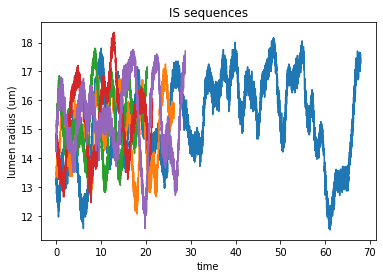

In [5]:
for IS in IS_list :
    plt.plot(data['t'][IS.ibegin:IS.iend]-IS.begin,data['lumen'][IS.ibegin:IS.iend])
    
plt.xlabel('time')
plt.ylabel('lumen radius (um)')
plt.title('IS sequences')

zoom on one second to see the cardiac pulsation

Text(0, 0.5, 'radius (um)')

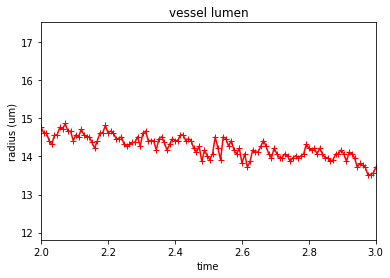

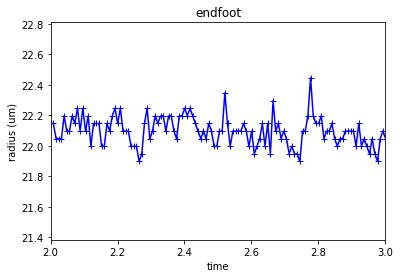

In [6]:
IS=IS_list[1]
lim=[2,3]

plt.plot(data['t'][IS.ibegin:IS.iend]-IS.begin,data['lumen'][IS.ibegin:IS.iend],'+-r')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

plt.figure()

plt.plot(data['t'][IS.ibegin:IS.iend]-IS.begin,data['endfoot'][IS.ibegin:IS.iend],'+-b')

plt.xlim(lim)
plt.title('endfoot')
plt.xlabel('time')
plt.ylabel('radius (um)')


In [7]:
#periodogram calculation
def periodogram(s,fs,window=sg.hanning):
    """Generate periodogram of a signal
    
    Parameters : 
        s (np.array): the signal to study 
        spantime (float): time points where to evaluate the signal
        
    Return :
        frq_fft (np.array): frequencies scale
        s_psd (np.array): signal power spectal density 
    """
    #fourier transform calculation  
    s_fft = fftpack.fft(s*window(len(s)))
    #spectral density (PSD)
    s_psd=np.abs(s_fft)**2
    frq_fft=fftpack.fftfreq(len(s_fft))*fs
    i=frq_fft>0 #select only postitive frequencies 
        
    return frq_fft[i],s_psd[i]

# time scale decomposition

In [76]:
cardiac={'bandname':'cardiac','cutoff1':4,'cutoff2':15}

LF={'bandname':'LF','cutoff1':1,'cutoff2':4}

VLF={'bandname':'VLF','cutoff1':0.05,'cutoff2':1}

continuous={'bandname':'continuous','cutoff1':0.0,'cutoff2':0.05}

/tmp/ipykernel_14169/1255767311.py:47: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,12])
/tmp/ipykernel_14169/1255767311.py:48: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,100])


(1.1628493937501711e-09, 100)

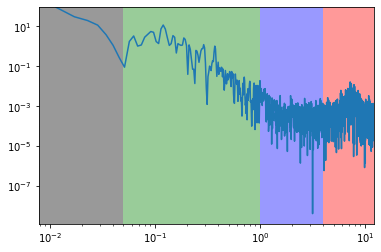

In [77]:
IS=REM_list[0]

time=np.array(data['t'][IS.ibegin:IS.iend]-IS.begin)

signal=data['lumen'][IS.ibegin:IS.iend]


time_step=time[1]-time[0]
fs=1/time_step

#frequency,power=periodogram(data['lumen'].values,1/time_step,window=sg.hamming)
frequency, Pxx_spec = sg.periodogram(signal,fs, 'hanning', scaling='density')


I=np.where((frequency<20)&(frequency>0.01))

fig, ax = plt.subplots()
ax.plot(frequency[I],Pxx_spec[I])
#plt.yscale('log')
#plt.xlim([0,12])
#plt.ylim([0,0.1])

from matplotlib.patches import Rectangle
# Create a Rectangle patch
rect = Rectangle((cardiac['cutoff1'],0 ),cardiac['cutoff2'] - cardiac['cutoff1'], 100, facecolor='r', alpha=0.4)
# Add the patch to the Axes
ax.add_patch(rect)

# Create a Rectangle patch
rect = Rectangle((LF['cutoff1'],0 ), LF['cutoff2'] - LF['cutoff1'], 100, facecolor='b', alpha=0.4)
# Add the patch to the Axes
ax.add_patch(rect)

# Create a Rectangle patch
rect = Rectangle((VLF['cutoff1'],0 ), VLF['cutoff2'] - VLF['cutoff1'], 100, facecolor='g', alpha=0.4)
# Add the patch to the Axes
ax.add_patch(rect)

# Create a Rectangle patch
rect = Rectangle((continuous['cutoff1'],0 ), continuous['cutoff2'] - continuous['cutoff1'], 100, facecolor='k', alpha=0.4)
# Add the patch to the Axes
ax.add_patch(rect)

plt.xscale('log')
plt.yscale('log')

plt.xlim([0,12])
plt.ylim([0,100])

In [78]:
min(frequency)

0.0

In [79]:
from  src.datanalysis import bandpassfilter

signal_cardiac=bandpassfilter(signal-np.mean(signal), fs, cardiac['cutoff1'], cardiac['cutoff2'])
signal_LF=bandpassfilter(signal-np.mean(signal), fs, LF['cutoff1'], LF['cutoff2'])
signal_VLF=bandpassfilter(signal-np.mean(signal), fs, VLF['cutoff1'], VLF['cutoff2'])
signal_continuous=bandpassfilter(signal-np.mean(signal), fs, continuous['cutoff1'], continuous['cutoff2'])

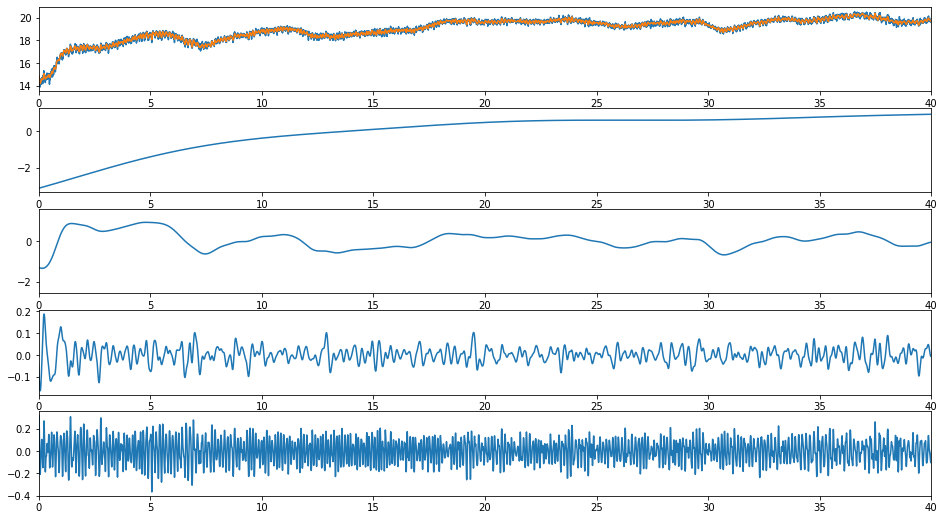

In [80]:
xmin=0
xmax=40

fig, axs = plt.subplots(5,1,figsize=(16,9), gridspec_kw={'height_ratios': [1,1, 1,1,1]})
axs[0].plot(time,signal)
axs[0].plot(time,np.mean(signal)+signal_continuous+signal_VLF+signal_LF+signal_cardiac)
axs[1].plot(time,signal_continuous)
axs[2].plot(time,signal_VLF)
axs[3].plot(time,signal_LF)
axs[4].plot(time,signal_cardiac)

for i in range(5):
    axs[i].set_xlim([xmin, xmax])


In [9]:
from scipy.signal import butter, filtfilt
from scipy import fftpack
import scipy.signal as sg

IS=IS_list[1]
signal=data['lumen'][IS.ibegin:IS.iend].values
time=data['t'][IS.ibegin:IS.iend].values

#filtering the high frequencies

time_step=time[1]-time[0]

fs=1/time_step

N=np.size(signal)

# windowing 
w = sg.blackman(N)
    
# The FFT of the signal
sig_fft = fftpack.fft(signal*w)
        
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2
        
# The corresponding frequencies
sample_freq = fftpack.fftfreq(signal.size, d=time_step)


# cardiac frequency
pos_mask = np.where((sample_freq >4)&(sample_freq<10))
freqs = sample_freq[pos_mask]
ipeak_freq0 =pos_mask[0][0]+ power[pos_mask].argmax()
peak_freq0 = freqs[power[pos_mask].argmax()]

#repiratory frequency
pos_mask = np.where((sample_freq >1.3)&(sample_freq<4))
freqs = sample_freq[pos_mask]
ipeak_freq01 =pos_mask[0][0]+ power[pos_mask].argmax()
peak_freq01 = freqs[power[pos_mask].argmax()]
    
    
#Filtre les hautes frequences
# cutoff
cutoff=10
        
nyq = 0.5 *fs 
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='low', analog=False)
signal_smooth = filtfilt(b, a, signal)

In [10]:
print(peak_freq0)

7.264219415786826


In [11]:
1/30

0.03333333333333333

Text(0, 0.5, 'radius (um)')

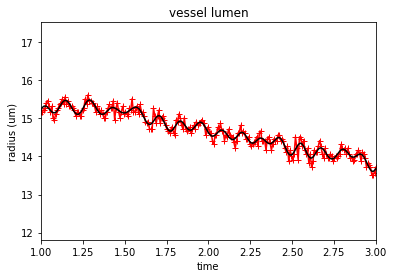

In [12]:
lim=[1,3]

plt.plot(time-IS.begin,signal,'+-r')
plt.plot(time-IS.begin,signal_smooth,'-k')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

In [13]:
#Filtre les basses frequences
# cutoff
cutoff=3
        
nyq = 0.5 *fs 
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='high', analog=False)
signal_smooth = filtfilt(b, a, signal_smooth)

Text(0, 0.5, 'radius (um)')

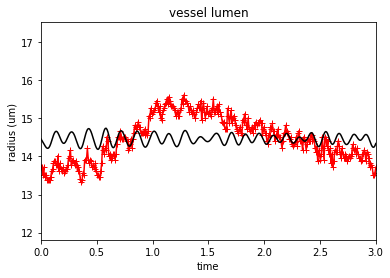

In [14]:
lim=[0,3]
I=np.where((time-IS.begin>=lim[0])&(time-IS.begin<=lim[1]))
plt.plot(time-IS.begin,signal,'+-r')
plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

### Compute mean peak to peak amplitude

(0.0, 3.0)

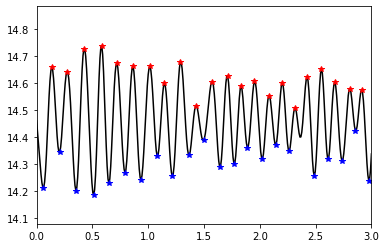

In [15]:
#peak detection 
peaks_indices=sg.argrelextrema(signal_smooth, np.greater, order=int(10))
pit_indices=sg.argrelextrema(-signal_smooth, np.greater, order=int(10))

[peaks_indices]
plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')
plt.plot(time[peaks_indices]-IS.begin,signal_smooth[peaks_indices]+np.mean(signal[I]),'*r')
plt.plot(time[pit_indices]-IS.begin,signal_smooth[pit_indices]+np.mean(signal[I]),'*b')

plt.xlim(lim)

(0.0, 3.0)

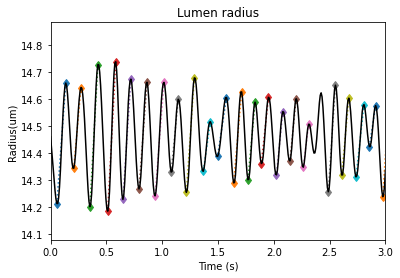

In [16]:
#amplitude detection

#amplitude plot 
ampl=[] # amplitude array
period=[]
t_psys=time[peaks_indices]-IS.begin # time of psys
t_pdia=time[pit_indices]-IS.begin #time of pdia
rsys=signal_smooth[peaks_indices]+np.mean(signal[I]) #list of psys 
rdia=signal_smooth[pit_indices]+np.mean(signal[I]) #list of pdia

for ti in t_psys :
    index_pdia=np.where((t_pdia>ti-1/peak_freq0) & (t_pdia<ti))
    index_psys=np.where(ti==t_psys)
    if(np.size(rsys[index_psys]-rdia[index_pdia])>0):
        ampl.append(rsys[index_psys][0]-rdia[index_pdia][0])
        period.append(t_psys[index_psys[0]]-t_psys[index_psys[0]-1])
        plt.plot([t_psys[index_psys][0],t_pdia[index_pdia][0]],[rsys[index_psys][0],rdia[index_pdia][0]],'d:')

plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')
        
plt.xlabel('Time (s)')
plt.ylabel('Radius(um)')
plt.title('Lumen radius')

plt.xlim(lim)

In [17]:
ISperiods=np.array(period).T[0]
ISampl=ampl

In [18]:
import seaborn as sbn

In [19]:
sbn.histplot(1/REMperiods,binwidth=0.5,label='REM sequence',color='purple',stat="percent")
sbn.histplot(1/ISperiods,binwidth=0.5,label='IS sequence',color='blue',stat="percent")
sbn.histplot(1/NREMperiods,binwidth=0.5,label='NREM sequence',color='orange',stat="percent")



plt.title('Carciac cycle')
plt.xlabel('freq. (Hertz)')
plt.legend()

NameError: name 'REMperiods' is not defined

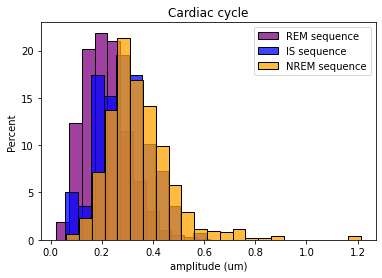

In [216]:
sbn.histplot(REMampl,binwidth=0.05,label='REM sequence',color='purple',stat="percent")
sbn.histplot(ISampl,binwidth=0.05,label='IS sequence',color='blue',stat="percent")
sbn.histplot(NREMampl,binwidth=0.05,label='NREM sequence',color='orange',stat="percent")

plt.title('Cardiac cycle')
plt.xlabel('amplitude (um)')
plt.legend()

# Low frequency analysis

In [31]:
from scipy.signal import butter, filtfilt
from scipy import fftpack
import scipy.signal as sg

IS=IS_list[5]
signal=data['lumen'][IS.ibegin:IS.iend].values
time=data['t'][IS.ibegin:IS.iend].values

#filtering the high frequencies

time_step=time[1]-time[0]

fs=1/time_step

N=np.size(signal)

# windowing 
w = sg.blackman(N)
    
# The FFT of the signal
sig_fft = fftpack.fft(signal*w)
        
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)
        
# The corresponding frequencies
sample_freq = fftpack.fftfreq(signal.size, d=time_step)


# cardiac frequency
pos_mask = np.where((sample_freq >4)&(sample_freq<10))
freqs = sample_freq[pos_mask]
ipeak_freq0 =pos_mask[0][0]+ power[pos_mask].argmax()
peak_freq0 = freqs[power[pos_mask].argmax()]

#repiratory frequency
pos_mask = np.where((sample_freq >1.3)&(sample_freq<4))
freqs = sample_freq[pos_mask]
ipeak_freq01 =pos_mask[0][0]+ power[pos_mask].argmax()
peak_freq01 = freqs[power[pos_mask].argmax()]
    
    
#Filtre les hautes frequences
# cutoff
cutoff=1
        
nyq = 0.5 *fs 
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='low', analog=False)
signal_smooth = filtfilt(b, a, signal)

IndexError: list index out of range

Text(0, 0.5, 'radius (um)')

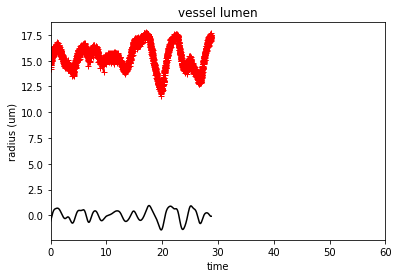

In [32]:
lim=[0,60]

plt.plot(time-IS.begin,signal,'+-r')
plt.plot(time-IS.begin,signal_smooth,'-k')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

In [29]:
#Filtre les basses frequences
# cutoff
cutoff=0.2
        
nyq = 0.5 *fs 
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='high', analog=False)
signal_smooth = filtfilt(b, a, signal_smooth)

In [33]:
fs

124.97499999966682

Text(0, 0.5, 'radius (um)')

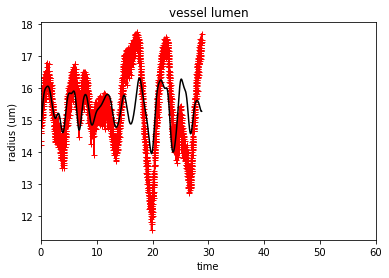

In [30]:
I=np.where((time-IS.begin>=lim[0])&(time-IS.begin<=lim[1]))
plt.plot(time-IS.begin,signal,'+-r')
plt.plot(time-IS.begin,signal_smooth+np.mean(signal),'-k')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

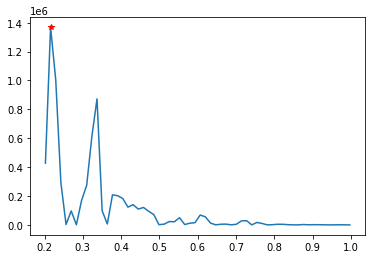

In [459]:
frequency,power=periodogram(signal_smooth,1/time_step,window=sg.hamming)

I=np.where((frequency<1)&(frequency>0.2))

imaxpeak=np.argmax(power)
LFfreq=frequency[imaxpeak]

plt.plot(frequency[I],power[I])
plt.plot(frequency[imaxpeak],power[imaxpeak],'*r')

#plt.yscale('log')

#plt.xlim([0,10])

(0.0, 60.0)

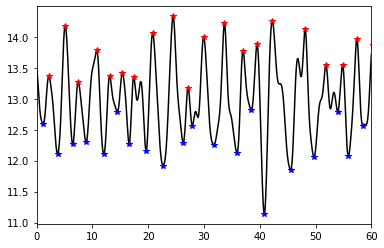

In [460]:
#peak detection 
peaks_indices=sg.argrelextrema(signal_smooth, np.greater, order=int(1/LFfreq/time_step/4))
pit_indices=sg.argrelextrema(-signal_smooth, np.greater, order=int(1/LFfreq/time_step/4))

[peaks_indices]
plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')
plt.plot(time[peaks_indices]-IS.begin,signal_smooth[peaks_indices]+np.mean(signal[I]),'*r')
plt.plot(time[pit_indices]-IS.begin,signal_smooth[pit_indices]+np.mean(signal[I]),'*b')

plt.xlim(lim)

(0.0, 60.0)

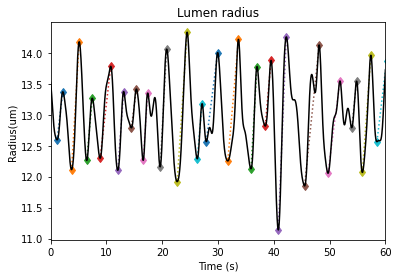

In [461]:
#amplitude detection

#amplitude plot 
ampl=[] # amplitude array
period=[]
t_psys=time[peaks_indices]-IS.begin # time of psys
t_pdia=time[pit_indices]-IS.begin #time of pdia
rsys=signal_smooth[peaks_indices]+np.mean(signal[I]) #list of psys 
rdia=signal_smooth[pit_indices]+np.mean(signal[I]) #list of pdia

for ti in t_psys :
    index_pdia=np.where((t_pdia>ti-1/LFfreq) & (t_pdia<ti))
    index_psys=np.where(ti==t_psys)
    if(np.size(rsys[index_psys]-rdia[index_pdia])>0):
        ampl.append(rsys[index_psys][0]-rdia[index_pdia][-1])
        period.append(t_psys[index_psys[0]]-t_psys[index_psys[0]-1])
        plt.plot([t_psys[index_psys][0],t_pdia[index_pdia][-1]],[rsys[index_psys][0],rdia[index_pdia][-1]],'d:')

plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')
        
plt.xlabel('Time (s)')
plt.ylabel('Radius(um)')
plt.title('Lumen radius')

plt.xlim(lim)

In [452]:
REMperiods=np.array(period).T[0]
REMampl=ampl

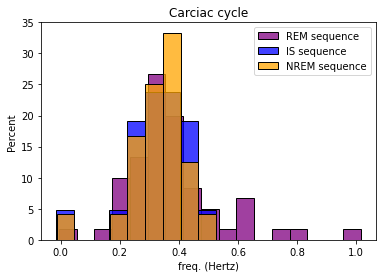

In [463]:
sbn.histplot(1/REMperiods,binwidth=0.06,label='REM sequence',color='purple',stat="percent")
sbn.histplot(1/ISperiods,binwidth=0.06,label='IS sequence',color='blue',stat="percent")
sbn.histplot(1/NREMperiods,binwidth=0.06,label='NREM sequence',color='orange',stat="percent")



plt.title('Carciac cycle')
plt.xlabel('freq. (Hertz)')
plt.legend()

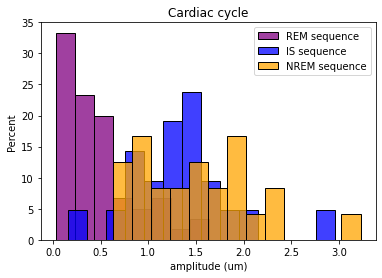

In [465]:
sbn.histplot(REMampl,binwidth=0.2,label='REM sequence',color='purple',stat="percent")
sbn.histplot(ISampl,binwidth=0.2,label='IS sequence',color='blue',stat="percent")
sbn.histplot(NREMampl,binwidth=0.2,label='NREM sequence',color='orange',stat="percent")

plt.title('Cardiac cycle')
plt.xlabel('amplitude (um)')
plt.legend()

# Very low frequency analysis

In [539]:
from scipy.signal import butter, filtfilt
from scipy import fftpack
import scipy.signal as sg

IS=NREM_list[0]
signal=data['lumen'][IS.ibegin:IS.iend].values
time=data['t'][IS.ibegin:IS.iend].values

#filtering the high frequencies

time_step=time[1]-time[0]

fs=1/time_step

N=np.size(signal)

# windowing 
w = sg.blackman(N)
    
# The FFT of the signal
sig_fft = fftpack.fft(signal*w)
        
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)
        
# The corresponding frequencies
sample_freq = fftpack.fftfreq(signal.size, d=time_step)


# cardiac frequency
pos_mask = np.where((sample_freq >4)&(sample_freq<10))
freqs = sample_freq[pos_mask]
ipeak_freq0 =pos_mask[0][0]+ power[pos_mask].argmax()
peak_freq0 = freqs[power[pos_mask].argmax()]

#repiratory frequency
pos_mask = np.where((sample_freq >1.3)&(sample_freq<4))
freqs = sample_freq[pos_mask]
ipeak_freq01 =pos_mask[0][0]+ power[pos_mask].argmax()
peak_freq01 = freqs[power[pos_mask].argmax()]
    
    
#Filtre les hautes frequences
# cutoff
cutoff=0.2
        
nyq = 0.5 *fs 
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='low', analog=False)
signal_smooth = filtfilt(b, a, signal)

Text(0, 0.5, 'radius (um)')

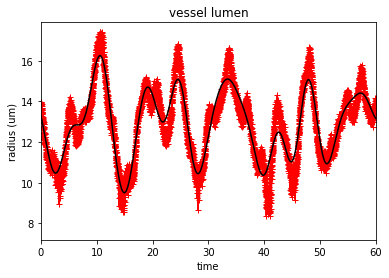

In [540]:
lim=[0,60]

plt.plot(time-IS.begin,signal,'+-r')
plt.plot(time-IS.begin,signal_smooth,'-k')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

In [541]:
#Filtre les basses frequences
# cutoff
cutoff=0.03
        
nyq = 0.5 *fs 
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='high', analog=False)
signal_smooth = filtfilt(b, a, signal_smooth)

Text(0, 0.5, 'radius (um)')

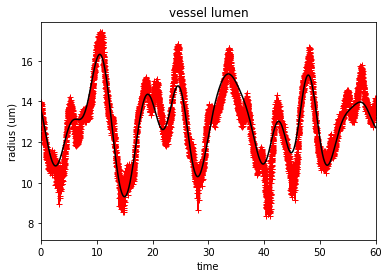

In [542]:
I=np.where((time-IS.begin>=lim[0])&(time-IS.begin<=lim[1]))
plt.plot(time-IS.begin,signal,'+-r')
plt.plot(time-IS.begin,signal_smooth+np.mean(signal),'-k')

plt.xlim(lim)
plt.title('vessel lumen')
plt.xlabel('time')
plt.ylabel('radius (um)')

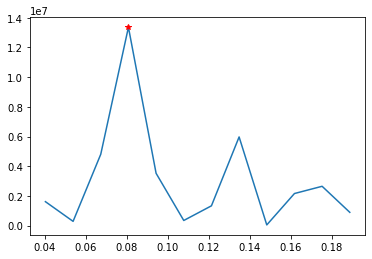

In [543]:
frequency,power=periodogram(signal_smooth,1/time_step,window=sg.hamming)

I=np.where((frequency<0.2)&(frequency>0.03))

imaxpeak=np.argmax(power)
LFfreq=frequency[imaxpeak]

plt.plot(frequency[I],power[I])
plt.plot(frequency[imaxpeak],power[imaxpeak],'*r')

#plt.yscale('log')

#plt.xlim([0,10])

(0.0, 60.0)

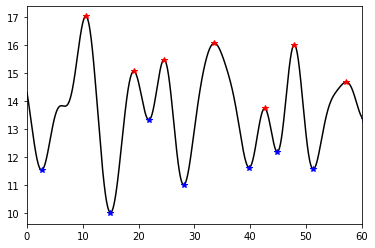

In [544]:
#peak detection 
peaks_indices=sg.argrelextrema(signal_smooth, np.greater, order=int(1/LFfreq/time_step/4))
pit_indices=sg.argrelextrema(-signal_smooth, np.greater, order=int(1/LFfreq/time_step/4))

[peaks_indices]
plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')
plt.plot(time[peaks_indices]-IS.begin,signal_smooth[peaks_indices]+np.mean(signal[I]),'*r')
plt.plot(time[pit_indices]-IS.begin,signal_smooth[pit_indices]+np.mean(signal[I]),'*b')

plt.xlim(lim)

/home/alexandra/anaconda3/envs/imaging/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alexandra/anaconda3/envs/imaging/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.0, 60.0)

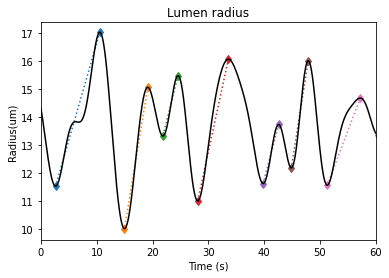

In [545]:
#amplitude detection

#amplitude plot 
ampl=[] # amplitude array
period=[]
mean=[]
t_psys=time[peaks_indices]-IS.begin # time of psys
t_pdia=time[pit_indices]-IS.begin #time of pdia
rsys=signal_smooth[peaks_indices]+np.mean(signal[I]) #list of psys 
rdia=signal_smooth[pit_indices]+np.mean(signal[I]) #list of pdia

for ti in t_psys :
    index_pdia=np.where((t_pdia>ti-1/LFfreq) & (t_pdia<ti))
    index_psys=np.where(ti==t_psys)
    if(np.size(rsys[index_psys]-rdia[index_pdia])>0):
        ampl.append(rsys[index_psys][0]-rdia[index_pdia][-1])
        period.append(t_psys[index_psys[0]]-t_psys[index_psys[0]-1])
        
        Imean=np.where((time<=t_psys[index_psys[0]][0]+IS.begin)&(time>=t_psys[index_psys[0]-1][0]+IS.begin))
        
        
        mean.append(np.mean(signal[Imean]))
        plt.plot([t_psys[index_psys][0],t_pdia[index_pdia][-1]],[rsys[index_psys][0],rdia[index_pdia][-1]],'d:')

plt.plot(time-IS.begin,signal_smooth+np.mean(signal[I]),'-k')
        
plt.xlabel('Time (s)')
plt.ylabel('Radius(um)')
plt.title('Lumen radius')

plt.xlim(lim)

NRperiods=np.array(period).T[0]
ISampl=ampl
ISmean=mean

In [546]:
NREMperiods=np.array(period).T[0]
NREMampl=ampl
NREMmean=mean

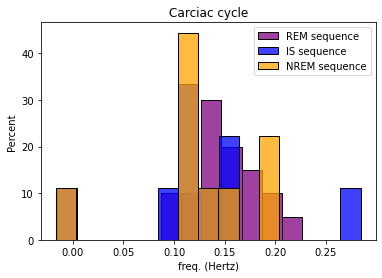

In [548]:
sbn.histplot(1/REMperiods,binwidth=0.02,label='REM sequence',color='purple',stat="percent")
sbn.histplot(1/ISperiods,binwidth=0.02,label='IS sequence',color='blue',stat="percent")
sbn.histplot(1/NREMperiods,binwidth=0.02,label='NREM sequence',color='orange',stat="percent")



plt.title('Carciac cycle')
plt.xlabel('freq. (Hertz)')
plt.legend()

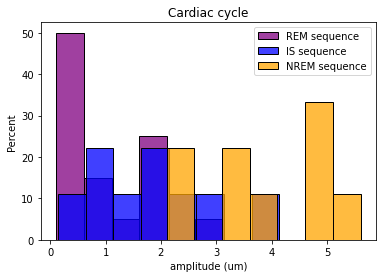

In [554]:
sbn.histplot(REMampl,binwidth=0.5,label='REM sequence',color='purple',stat="percent")
sbn.histplot(ISampl,binwidth=0.5,label='IS sequence',color='blue',stat="percent")
sbn.histplot(NREMampl,binwidth=0.5,label='NREM sequence',color='orange',stat="percent")

plt.title('Cardiac cycle')
plt.xlabel('amplitude (um)')
plt.legend()

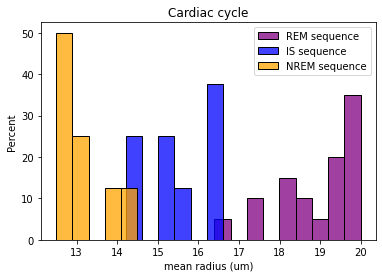

In [553]:
sbn.histplot(REMmean,binwidth=0.4,label='REM sequence',color='purple',stat="percent")
sbn.histplot(ISmean,binwidth=0.4,label='IS sequence',color='blue',stat="percent")
sbn.histplot(NREMmean,binwidth=0.4,label='NREM sequence',color='orange',stat="percent")

plt.title('Cardiac cycle')
plt.xlabel('mean radius (um)')
plt.legend()

In [377]:
# parameters
time_window=1/LFfreq #s 
time_slide=1/LFfreq #s


nb_analysed_windows=0
    

ti=time[0]

amp=[]

while ti<time[-1]-time_window:
    I=np.where((time<=ti+time_window*1.5)&(time>=ti))
    amp.append(np.max(signal_smooth[I])-np.min(signal_smooth[I]))
    ti+=time_window

In [386]:
np.mean(ampl)

2.7478300867723555

## vessel contact

(1.0, 2.0)

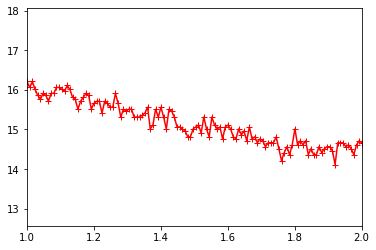

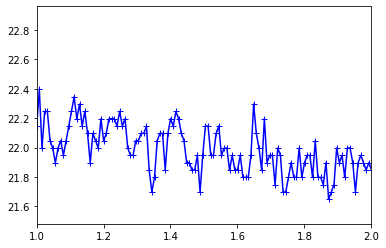

In [66]:
IS=IS_list[2]
lim=[1,2]

plt.plot(data['t'][IS.ibegin:IS.iend]-IS.begin,data['lumen'][IS.ibegin:IS.iend],'+-r')

plt.xlim(lim)

plt.figure()

plt.plot(data['t'][IS.ibegin:IS.iend]-IS.begin,data['endfoot'][IS.ibegin:IS.iend],'+-b')

plt.xlim(lim)

In [36]:
data.iloc[102604]

t          820.996199
state             REM
endfoot     16.954386
lumen       10.820888
Name: 102604, dtype: object